In [1]:
# Download the dataset
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/071/024/original/SteelPlant.csv

--2024-11-12 16:21:41--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/071/024/original/SteelPlant.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.158.41.214, 108.158.41.222, 108.158.41.203, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.158.41.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3133750 (3.0M) [text/plain]
Saving to: ‘SteelPlant.csv.2’

SteelPlant.csv.2    100%[===================>]   2.99M  --.-KB/s    in 0.05s   

2024-11-12 16:21:41 (56.8 MB/s) - ‘SteelPlant.csv.2’ saved [3133750/3133750]



In [2]:
import pandas as pd
df = pd.read_csv('SteelPlant.csv')

### Create target column
reverse one-hot encoding

In [3]:
df['Target'] = df.iloc[:, -7:].idxmax(axis='columns')

In [4]:
from scipy.stats import entropy
# help(entropy)

### Find entropy of target

In [5]:
p = df['Target'].value_counts(normalize=True)
entropy(p, base=2)

np.float64(2.364097425566414)

### Should we balance target ?

<Axes: xlabel='Target'>

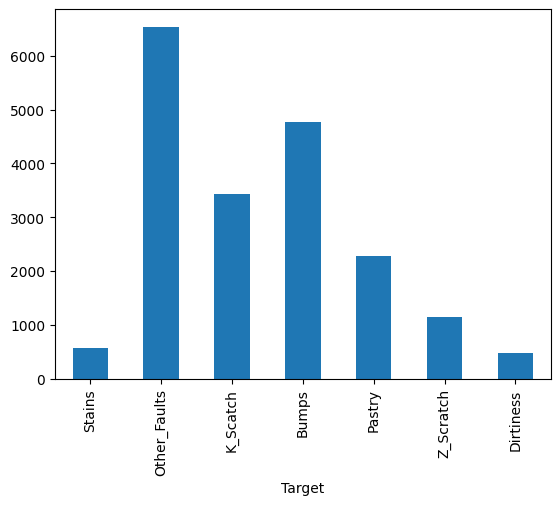

In [6]:
df['Target'].value_counts(sort=False).plot.bar()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Pixels_Areas', 'SigmoidOfAreas']], df['Target'], test_size=0.25)

from sklearn.tree import DecisionTreeClassifier
dTreeClf = DecisionTreeClassifier(max_depth=3, random_state=42)
dTreeClf.fit(X=X_train, y=y_train)

imp = dTreeClf.tree_.impurity[0]
ftr = X_train.columns[dTreeClf.tree_.feature[0]]

ftr, round(imp, 3)

('Pixels_Areas', np.float64(0.771))

### D96 Q2. Most Misclassified DT

In [8]:
from sklearn.metrics import classification_report

X, y = df.drop(df.columns[-8:], axis='columns'), df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.tree import DecisionTreeClassifier
dTreeClf = DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight="balanced")
dTreeClf.fit(X=X_train, y=y_train)

y_pred = dTreeClf.predict(X_test)

import numpy as np
report = classification_report(y_test, y_pred, target_names=np.unique(y_test))
print(report)

              precision    recall  f1-score   support

       Bumps       0.39      0.39      0.39      1165
   Dirtiness       0.14      0.18      0.16       107
    K_Scatch       0.83      0.83      0.83       852
Other_Faults       0.41      0.39      0.40      1671
      Pastry       0.22      0.21      0.22       605
      Stains       0.62      0.65      0.63       130
   Z_Scratch       0.40      0.44      0.42       275

    accuracy                           0.45      4805
   macro avg       0.43      0.44      0.44      4805
weighted avg       0.45      0.45      0.45      4805



### D96 Q3

In [30]:
depths = [3, 5, 7, 11, 13, 15, 19, 20]

from sklearn.model_selection import cross_validate, KFold
kf = KFold(n_splits=2)

for d in depths:
    model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=d)
    cv_acc_results = cross_validate(model, X_train, y_train, cv=kf, scoring='accuracy', return_train_score=True)
    print(f"depth: {d:2d} - Accuracy Mean: Train: {cv_acc_results['train_score'].mean() * 100:.2f}%, Validation: {cv_acc_results['test_score'].mean() * 100:.2f}%", end="\t")
    print(f"Accuracy Std: Train: {cv_acc_results['train_score'].std() * 100:.2f}%, Validation: {cv_acc_results['test_score'].std() * 100:.2f}%")
    # print("")

depth:  3 - Accuracy Mean: Train: 37.16%, Validation: 36.71%	Accuracy Std: Train: 4.73%, Validation: 5.33%
depth:  5 - Accuracy Mean: Train: 48.27%, Validation: 47.20%	Accuracy Std: Train: 0.32%, Validation: 0.19%
depth:  7 - Accuracy Mean: Train: 48.35%, Validation: 45.15%	Accuracy Std: Train: 2.31%, Validation: 2.33%
depth: 11 - Accuracy Mean: Train: 61.34%, Validation: 46.96%	Accuracy Std: Train: 0.35%, Validation: 0.16%
depth: 13 - Accuracy Mean: Train: 70.04%, Validation: 47.45%	Accuracy Std: Train: 0.08%, Validation: 0.10%
depth: 15 - Accuracy Mean: Train: 79.43%, Validation: 47.69%	Accuracy Std: Train: 0.88%, Validation: 0.29%
depth: 19 - Accuracy Mean: Train: 91.95%, Validation: 47.22%	Accuracy Std: Train: 2.05%, Validation: 0.57%
depth: 20 - Accuracy Mean: Train: 93.44%, Validation: 47.70%	Accuracy Std: Train: 2.13%, Validation: 0.56%


Note: depth=5 has is best -- training accuracy is approx equal to testing accuracy

In [ ]:
d = 5
model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=d)

model.fit(X_train, y_train)

pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).iloc[:3]

Outside_X_Index       0.319797
Pixels_Areas          0.294860
Length_of_Conveyer    0.125352
dtype: float64